In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#now define a function which returns the region of interest
def roi(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    make_color_count = 255
    cv2.fillPoly(mask,vertices, make_color_count)
    mask_image = cv2.bitwise_and(img,mask)
    return mask_image

##now define a function to draw lines and return the image
def draw_line(img, lines):
    img = np.copy(img)
    line_image = np.zeros((img.shape[0],img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image, (x1,y1),(x2,y2), (0,253,8),3)
    final_image = cv2.addWeighted(img,.8, line_image,1, 0.0)
    return final_image

def process(image):
    ###first we need to get the region of interest
    #get the image shape, height and width
    height = image.shape[0]
    width = image.shape[1]
    roi_vertices = [
        (0,height),
        (width/2,height/2),
        (width,height)
                    ]

    #now apply canny edge before applying Hough Line Transform.But this will find the edge of the
    #outer periphera of the roi.
    #to get rid of this situation we need to first apply canny edge detection then find the roi
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny = cv2.Canny(gray_image, 100, 120)
    cropped_image = roi(canny,np.array([roi_vertices],np.int32))

    #Now apply Hough Line Transform
    lines = cv2.HoughLinesP(cropped_image,6, np.pi/280, 160,lines=np.array([]), minLineLength=40, maxLineGap=20)

    road_line = draw_line(image,lines)
    return road_line
    

#import the video
cap = cv2.VideoCapture('lanes.mp4')

while(True):
    ret,frame = cap.read()
    if ret==True:
    
        frame = process(frame)

        cv2.imshow('Frame', frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

(1080, 2340, 3)


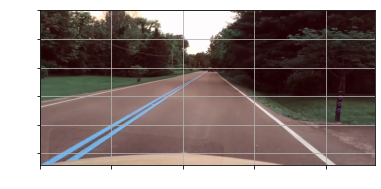